### Goal
- Investigate top-paying roles and skills in the data science industry.
- Use Python to explore a real-live dataset on job postings.
- For job-seekers: use these insights to help find the best job opportunities.

Questions to Answer


1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Exploratory Data Analysis for all Data Roles

Roles

Text(0.5, 0, 'Number of Jobs')

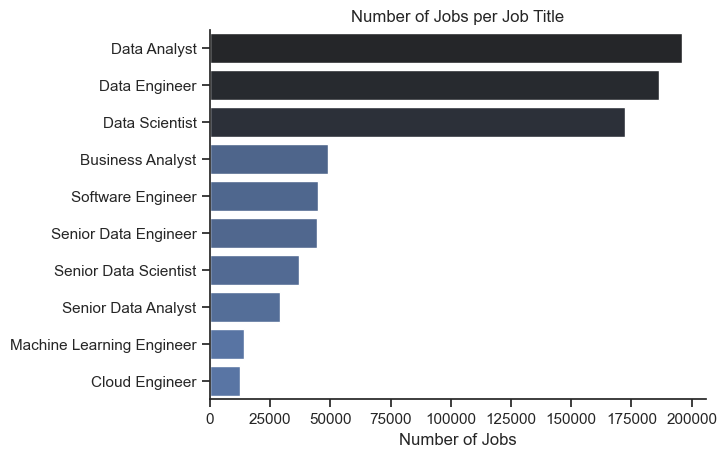

In [11]:
df_all = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data=df_all, x= 'count', y= 'job_title_short',hue= 'count', palette='dark:b_r', legend= False)
sns.despine() # removes the frame 

plt.title('Number of Jobs per Job Title')
plt.ylabel('')
plt.xlabel('Number of Jobs')

Countries

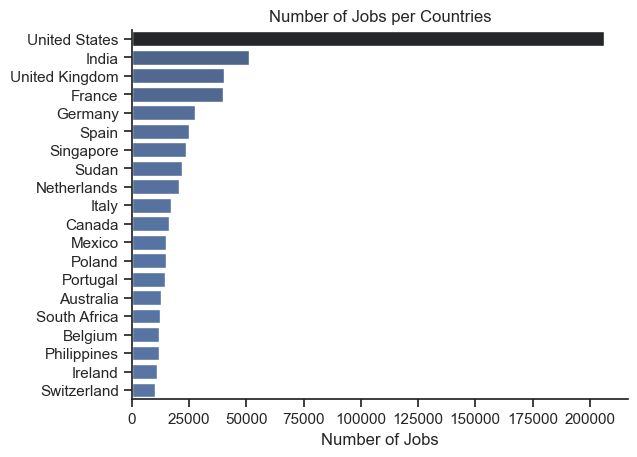

In [25]:
df_countries = df['job_country'].value_counts().head(20).to_frame()

sns.barplot(data=df_countries , x= 'count' , y= 'job_country',hue='count', palette= 'dark:b_r', legend= False)
sns.despine() # removes the frame 

plt.title('Number of Jobs per Countries')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

Companies

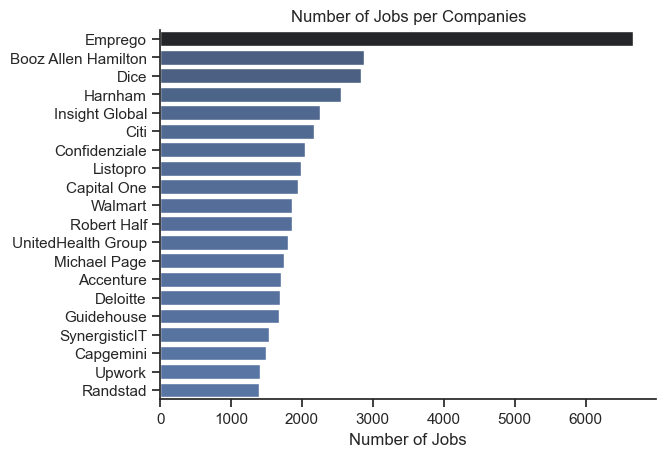

In [31]:
df_companies = df["company_name"].value_counts().head(20).to_frame()

sns.barplot(data= df_companies , x= 'count', y= 'company_name', hue='count', palette= 'dark:b_r', legend=False )
sns.despine() # removes the frame 

plt.title('Number of Jobs per Companies')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

Job Opportunities

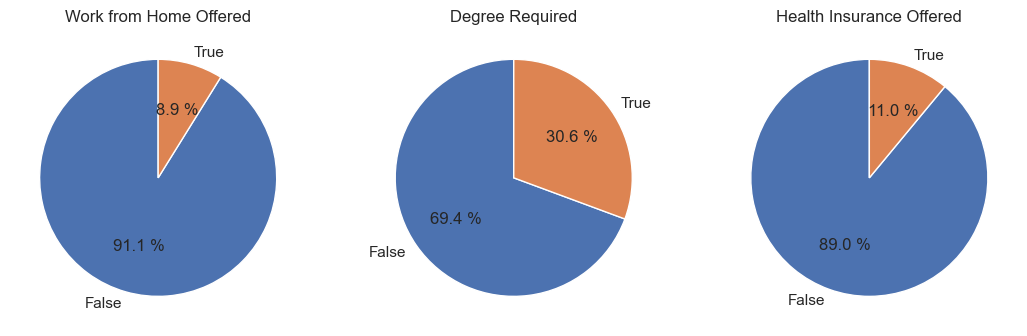

In [54]:
dict = {'job_work_from_home': 'Work from Home Offered',
         'job_no_degree_mention': 'Degree Required',
         'job_health_insurance': 'Health Insurance Offered'
         }

fig, ax = plt.subplots(1,3, figsize= (13,7))

for i,(column,title) in enumerate(dict.items()):
    ax[i].pie(df[column].value_counts(), startangle= 90, labels= ['False', 'True'], autopct= '%1.1f %%')
    ax[i].set_title(title)

plt.show()

### Exploratory Data Analysis for Data Analysts in the US

In [56]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]


Location

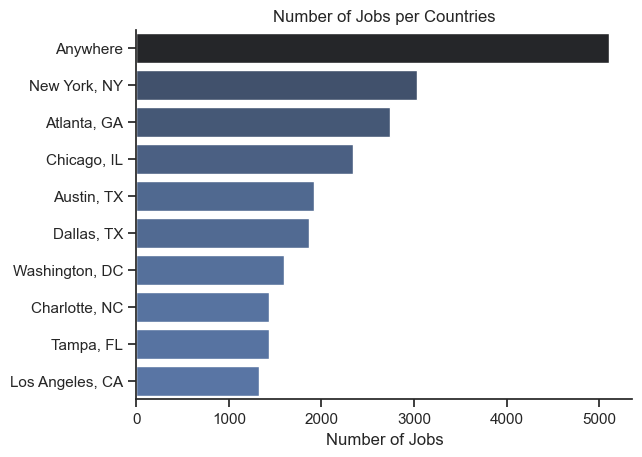

In [63]:
df_DA_US_location = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_DA_US_location , x= 'count' , y= 'job_location',hue='count', palette= 'dark:b_r', legend= False)
sns.despine() # removes the frame 

plt.title('Number of Jobs per Countries')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

Companies

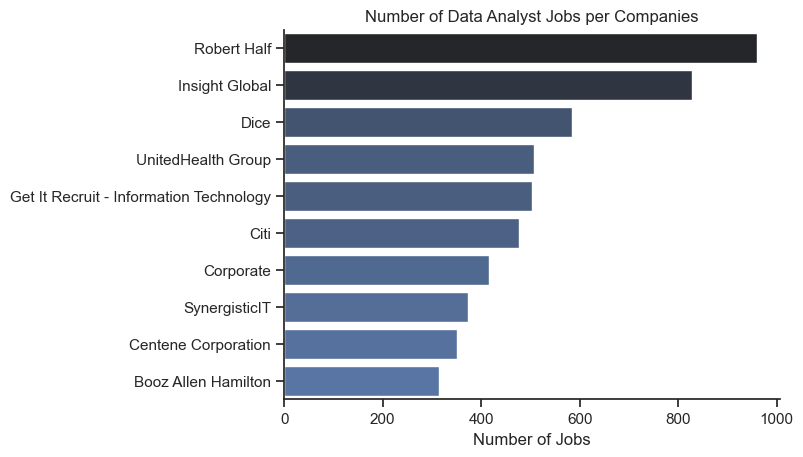

In [65]:
df_DA_US_companies = df_DA_US["company_name"].value_counts().head(10).to_frame()

sns.barplot(data= df_DA_US_companies , x= 'count', y= 'company_name', hue='count', palette= 'dark:b_r', legend=False )
sns.despine() # removes the frame 

plt.title('Number of Data Analyst Jobs per Companies')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

Job Opportunities

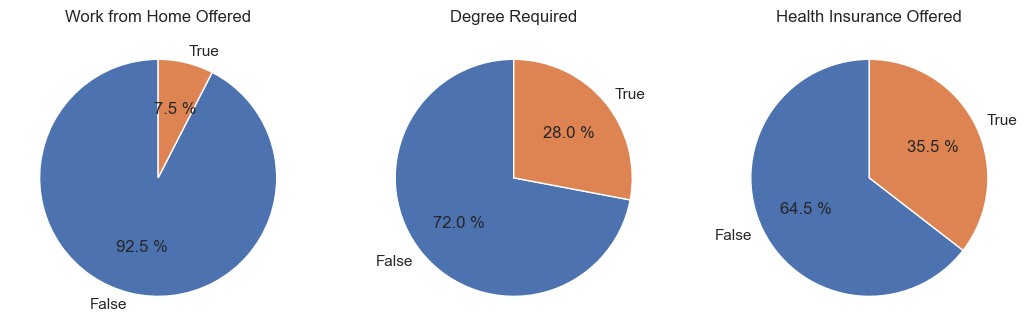

In [66]:
dict = {'job_work_from_home': 'Work from Home Offered',
         'job_no_degree_mention': 'Degree Required',
         'job_health_insurance': 'Health Insurance Offered'
         }

fig, ax = plt.subplots(1,3, figsize= (13,7))

for i,(column,title) in enumerate(dict.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle= 90, labels= ['False', 'True'], autopct= '%1.1f %%')
    ax[i].set_title(title)